# kaggle competition
## Spaceship Titanic
### train.csv : Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
### test.csv : Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
### sample_submission.csv : A submission file in the correct format.PassengerId - Id for each passenger in the test set. Transported - The target. For each passenger, predict either True or False.

- reference : https://www.kaggle.com/competitions/spaceship-titanic/data


In [548]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [549]:
# Find some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [550]:
# How to manage NULL? - make models that can predict column
# First, find not NULL rows - use 'dropna'
df_notnull = df.dropna()
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [551]:
# preprocessing the df_notnull
# Finding unique values to make category type. I will use randomforest model, so I will do label encoding
# Earth:0, Europa:1, Mars:2
df_notnull = df_notnull.copy() # to use totally new df - erase warning
print(df_notnull['HomePlanet'].unique())
df_notnull['HomePlanet_C'] = df_notnull['HomePlanet'].astype('category').cat.codes
df_notnull['HomePlanet_C'].astype('category')
print(df_notnull['HomePlanet_C'].value_counts())
print(df_notnull[['HomePlanet','HomePlanet_C']].head(3))

['Europa' 'Earth' 'Mars']
HomePlanet_C
0    3566
1    1673
2    1367
Name: count, dtype: int64
  HomePlanet  HomePlanet_C
0     Europa             1
1      Earth             0
2     Europa             1


In [552]:
# change 'CryoSleep' as bool type
df_notnull['CryoSleep'] = df_notnull['CryoSleep'].astype('bool')
df_notnull['CryoSleep'].value_counts()

,count
CryoSleep,
False,4274
True,2332


In [553]:
# cabin - divide as 'cabindeck','cabinnum','cabinside'
df_notnull['Cabindeck'] = df_notnull['Cabin'].str.split('/').str[0]
df_notnull['Cabinnum'] = df_notnull['Cabin'].str.split('/').str[1]
df_notnull['Cabinside'] = df_notnull['Cabin'].str.split('/').str[2]
print(df_notnull[['Cabindeck','Cabinnum','Cabinside']].head(1))
print(df_notnull['Cabin'].head(1))
print(df_notnull[['Cabindeck','Cabinnum','Cabinside']].info())

  Cabindeck Cabinnum Cabinside
0         B        0         P
0    B/0/P
Name: Cabin, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cabindeck  6606 non-null   object
 1   Cabinnum   6606 non-null   object
 2   Cabinside  6606 non-null   object
dtypes: object(3)
memory usage: 206.4+ KB
None


In [554]:
# change deck,side 2 columns as categoty
# A,B,C,D,E,F,G,T - 0~7
print(df_notnull['Cabindeck'].unique())
df_notnull['Cabindeck'] = df_notnull['Cabindeck'].astype('category').cat.codes
df_notnull['Cabindeck'].astype('category')
print(df_notnull['Cabindeck'].unique())

['B' 'F' 'A' 'G' 'E' 'C' 'D' 'T']
[1 5 0 6 4 2 3 7]


In [555]:
# P,S - 0,1
print(df_notnull['Cabinside'].unique())
df_notnull['Cabinside'] = df_notnull['Cabinside'].astype('category').cat.codes
df_notnull['Cabinside'].astype('category')
print(df_notnull['Cabinside'].unique())

['P' 'S']
[0 1]


In [556]:
# Change cabinnum as int
df_notnull['Cabinnum'] = df_notnull['Cabinnum'].astype('int')
df_notnull['Cabinnum'].unique()

array([   0,    1,    2, ..., 1894, 1499,  608])

In [557]:
# Destination, it can be changed as category
# 55cancri e:0 ,PSO J318.5-22:1, TRAPPIST-1e: 2
print(df_notnull['Destination'].unique())
df_notnull['Destination_C'] = df_notnull['Destination'].astype('category').cat.codes
df_notnull['Destination_C'].astype('category')
print(df_notnull['Destination_C'].unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[2 1 0]


In [558]:
# VIP can be changed as bool type
df_notnull['VIP'] = df_notnull['VIP'].astype('bool')

In [559]:
# Combine amenities
df_notnull['Amenities'] = df_notnull['RoomService'] + df_notnull['FoodCourt'] + df_notnull['ShoppingMall'] + df_notnull['Spa'] + df_notnull['VRDeck']
# Make 4 levels (0~25%,25~50%,50~75%, 75~100%) in Amenities
df_notnull['Amenities'] = pd.qcut(df_notnull['Amenities'],q=[0, 0.5, 0.75, 1.0],labels = [1,2,3], duplicates = 'drop' )
df_notnull['Amenities'].value_counts()

,count
Amenities,
1,3306
3,1652
2,1648


In [560]:
# Using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_notnull[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' ]] = scaler.fit_transform(df_notnull[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' ]])
df_notnull[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' ]].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,0.022479,0.016065,0.014556,0.013975,0.014938
std,0.065019,0.056304,0.047036,0.051054,0.055426
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.004940,0.002776,0.002448,0.002901,0.002557
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [561]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    6606 non-null   object  
 1   HomePlanet     6606 non-null   object  
 2   CryoSleep      6606 non-null   bool    
 3   Cabin          6606 non-null   object  
 4   Destination    6606 non-null   object  
 5   Age            6606 non-null   float64 
 6   VIP            6606 non-null   bool    
 7   RoomService    6606 non-null   float64 
 8   FoodCourt      6606 non-null   float64 
 9   ShoppingMall   6606 non-null   float64 
 10  Spa            6606 non-null   float64 
 11  VRDeck         6606 non-null   float64 
 12  Name           6606 non-null   object  
 13  Transported    6606 non-null   bool    
 14  HomePlanet_C   6606 non-null   int8    
 15  Cabindeck      6606 non-null   int8    
 16  Cabinnum       6606 non-null   int64   
 17  Cabinside      6606 non-null   int8   

In [562]:
# make train,test set
# I guess cabinnum could be a problem cause it is int and could be related with side and deck
from sklearn.model_selection import train_test_split
X = df_notnull[['HomePlanet_C','CryoSleep','Destination_C','Cabindeck','Cabinside','Destination_C','VIP',
               'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Amenities' ]]
y = df_notnull['Transported']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, stratify =y, random_state = 1)

# CheckPoint!


In [563]:
## Checkpoint - accuracy the model of the notnull data with other models
# Using RandomForest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100,max_depth = 10, random_state = 1)

model_rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [564]:
# Find accuracy
from sklearn.metrics import accuracy_score
y_pred_rf = model_rf.predict(X_test)
print('Accuracy with the notnull and RandomForest : ',accuracy_score(Y_test, y_pred_rf))

Accuracy with the notnull and RandomForest :  0.7835519677093845


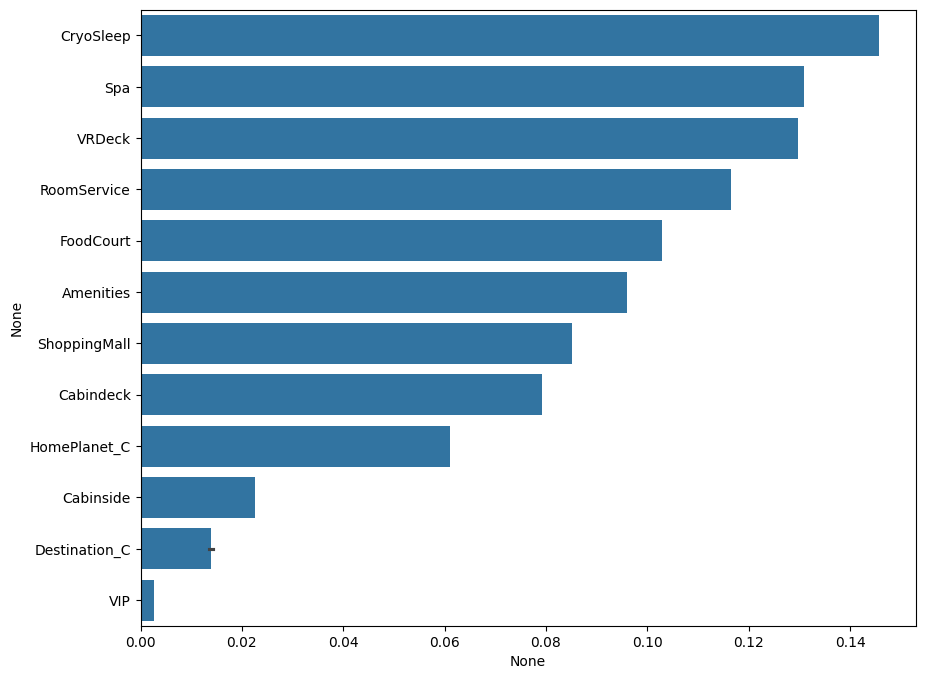

In [565]:
# Finding feature importance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

importance_values = model_rf.feature_importances_
importances = pd.Series(importance_values, index = X.columns)

plt.figure(figsize = (10,8))
sns.barplot(x = importances.sort_values(ascending = False),y=importances.sort_values(ascending=False).index)
plt.show()

In [566]:
# How about XGBoost?
# change bool type into int
df_notnull['CryoSleep'] = df_notnull['CryoSleep'].astype('int')
df_notnull['VIP'] = df_notnull['VIP'].astype('int')
df_notnull['Transported'] = df_notnull['Transported'].astype('int')
X = df_notnull[['HomePlanet_C','CryoSleep','Destination_C','Cabindeck','Cabinside','VIP','Destination_C',
               'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' ]]
y = df_notnull['Transported']
X = X.values
y = y.values
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, stratify =y, random_state = 1)

In [567]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model_xgb.fit(X_train,Y_train)
y_pred_xgb = model_xgb.predict(X_test)
print('Accuracy with the notnull and XGBoost : ',accuracy_score(Y_test, y_pred_xgb))

Accuracy with the notnull and XGBoost :  0.7855701311806257


Making criteria to replace NULL

In [568]:
df['Amenities'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
# Make 4 levels (0~25%,25~50%,50~75%, 75~100%) in Amenities
df['Amenities'] = pd.qcut(df['Amenities'],q=[0, 0.5, 0.75, 1.0],labels = [1,2,3], duplicates = 'drop' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  Amenities     7785 non-null   category
dtypes: bool(1), category(1), float64(6), object(7)
memory usage: 900.1+ KB


In [569]:
# Make Amenities_n with skip null of Amenities
df['Amenities_n'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis = 1, skipna = True)
df['Amenities_n'] = pd.qcut(df['Amenities_n'],q=[0, 0.5, 0.75, 1.0],labels = [1,2,3], duplicates = 'drop' )
df['Amenities_n'].value_counts()

,count
Amenities_n,
1,4347
2,2173
3,2173


In [570]:
# Replace null as this
df.loc[df['Amenities'].isnull(),'Amenities'] = df.loc[df['Amenities'].isnull(),'Amenities_n']

In [571]:
# Grouping by Homeplanet
df_notnull.groupby(['HomePlanet'])[['Cabindeck','Destination']].value_counts().reset_index()

,HomePlanet,Cabindeck,Destination,count
0,Earth,6,TRAPPIST-1e,1308
1,Earth,5,TRAPPIST-1e,889
2,Earth,6,PSO J318.5-22,372
3,Earth,6,55 Cancri e,293
4,Earth,4,TRAPPIST-1e,249
5,Earth,5,55 Cancri e,219
6,Earth,5,PSO J318.5-22,172
7,Earth,4,55 Cancri e,40
8,Earth,4,PSO J318.5-22,24
9,Europa,1,TRAPPIST-1e,346


In [572]:
# If Cabindeck is 0,1,2,7 , then HomePlanet is Europa, 3,4 then Mars, 5,6 is Earth
df['Cabindeck'] = df['Cabin'].str.split('/').str[0]
df['Cabinnum'] = df['Cabin'].str.split('/').str[1]
df['Cabinside'] = df['Cabin'].str.split('/').str[2]
df['Cabindeck'] = df['Cabindeck'].astype('category').cat.codes
df['Cabindeck'].astype('category').head()

,Cabindeck
0,1
1,5
2,0
3,0
4,5


In [573]:
# Replace null of HomePlanet as most frequent value
df.loc[(df['Cabindeck'].isin([0,1,2,7]))&(df['HomePlanet'].isnull()),'HomePlanet'] = 'Europa'
df.loc[(df['Cabindeck'].isin([3,4]))&(df['HomePlanet'].isnull()),'HomePlanet'] = 'Mars'
df.loc[(df['Cabindeck'].isin([5,6]))&(df['HomePlanet'].isnull()),'HomePlanet'] = 'Earth'
value = df['HomePlanet'].mode()[0]
print('mode of HomePlanet: ',value)
df['HomePlanet'] = df['HomePlanet'].fillna(value)

mode of HomePlanet:  Earth


In [574]:
# Relation between Cryosleep and Amenities
df_notnull.groupby(['CryoSleep'])[['Amenities']].value_counts().reset_index()

,CryoSleep,Amenities,count
0,0,3,1652
1,0,2,1648
2,0,1,974
3,1,1,2332
4,1,2,0
5,1,3,0


In [575]:
# if Amenities are 2,3 , then CryoSleep is False and 1, then True
df.loc[(df['Amenities'].isin([2,3]))&(df['CryoSleep'].isnull()),'CryoSleep'] = False
df['CryoSleep'] = df['CryoSleep'].fillna(True)

/tmp/ipython-input-4008123023.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(True)


In [576]:
# Destination -> use most common value TRAPPIST-1e
df.groupby(['HomePlanet','Amenities'])['Destination'].value_counts()

/tmp/ipython-input-1765073863.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['HomePlanet','Amenities'])['Destination'].value_counts()


HomePlanet  Amenities  Destination  
Earth       1          TRAPPIST-1e      1492
                       PSO J318.5-22     558
                       55 Cancri e       469
            2          TRAPPIST-1e      1317
                       55 Cancri e       166
                       PSO J318.5-22     123
            3          TRAPPIST-1e       399
                       55 Cancri e        67
                       PSO J318.5-22      45
Europa      1          TRAPPIST-1e       545
                       55 Cancri e       470
                       PSO J318.5-22      10
            2          TRAPPIST-1e        11
                       55 Cancri e         1
                       PSO J318.5-22       0
            3          TRAPPIST-1e       653
                       55 Cancri e       426
                       PSO J318.5-22       9
Mars        1          TRAPPIST-1e       709
                       55 Cancri e       101
                       PSO J318.5-22      15
            2          TRAPPIST-1e       380
                       55 Cancri e        34
                       PSO J318.5-22      24
            3          TRAPPIST-1e       409
                       55 Cancri e        66
                       PSO J318.5-22      12
Name: count, dtype: int64

In [577]:
df.loc[df['Destination'].isnull(),'Destination']='TRAPPIST-1e'

In [578]:
# Age - repalce null as median
value = df['Age'].median()
print('median of Age: ', value)
df['Age'] = df['Age'].fillna(value)
df.info()

median of Age:  27.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8693 non-null   bool    
 3   Cabin         8494 non-null   object  
 4   Destination   8693 non-null   object  
 5   Age           8693 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  Amenities     8693 non-null   category
 15  Amenities_n   8693 non-null   category
 16  Cabindeck     8693 non-null   int8    
 17  Cabinnum      8494 non-null   o

In [579]:
# Changeing some values to make predict model
X_df = df[['HomePlanet','CryoSleep','Destination','Age','Amenities','Cabindeck']]
X_df = X_df.copy()
X_df['HomePlanet'] = X_df['HomePlanet'].astype('category').cat.codes
X_df['HomePlanet'] = X_df['HomePlanet'].astype('category')
X_df['Destination'] = X_df['Destination'].astype('category').cat.codes
X_df['Destination'] = X_df['Destination'].astype('category')
X_df['CryoSleep'] = X_df['CryoSleep'].astype('bool')
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   HomePlanet   8693 non-null   category
 1   CryoSleep    8693 non-null   bool    
 2   Destination  8693 non-null   category
 3   Age          8693 non-null   float64 
 4   Amenities    8693 non-null   category
 5   Cabindeck    8693 non-null   int8    
dtypes: bool(1), category(3), float64(1), int8(1)
memory usage: 110.8 KB


In [580]:
y = df['Transported']
y.value_counts()

,count
Transported,
True,4378
False,4315


In [581]:
# Making predicting model with RandomForest
model = RandomForestClassifier(n_estimators = 100,max_depth = 30, random_state = 1)
model.fit(X_df,y)
y_pred = model.predict(X_df)
print('Accuracy in RandomForest : ',accuracy_score(y, y_pred))

Accuracy in RandomForest :  0.8089267226504083


In [582]:
# Making predicting model with XGB - no difference between RF and XGB
X_df_v = X_df.values
y_v = y.values
model_xgb = XGBClassifier(n_estimators = 100, max_depth = 30, random_state = 1)
model_xgb.fit(X_df_v,y_v)
y_pred_xgb = model_xgb.predict(X_df_v)
print('Accuracy in XGB : ',accuracy_score(y_v, y_pred_xgb))

Accuracy in XGB :  0.8086966524790061


In [583]:
# Making predicting model with LogisticRegression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter = 100,C=1, random_state = 1)
model_lr.fit(X_df,y)
y_pred_lr = model_lr.predict(X_df)
print('Accuracy in LogisticRegression : ',accuracy_score(y, y_pred_lr))

Accuracy in LogisticRegression :  0.7295525135166225


In [584]:
# Making prediction model with SVC
from sklearn.svm import SVC
model_svc = SVC(C=1,random_state = 1)
model_svc.fit(X_df,y)
y_pred_svc = model_svc.predict(X_df)
print('Accuracy in SVC : ',accuracy_score(y, y_pred_svc))

Accuracy in SVC :  0.7412860922581387


In [585]:
# Using soft voting with SVC,XGB, LR
from sklearn.ensemble import VotingClassifier
model_r = RandomForestClassifier(n_estimators = 100,max_depth = 30, random_state = 1)
model_x = XGBClassifier(n_estimators = 100, max_depth = 30, random_state = 1)
model_s = SVC(probability = True, random_state = 1)
model_l = LogisticRegression(max_iter = 100, random_state = 1)

model_voting = VotingClassifier(
    estimators=[('xgb',model_x),('svc',model_s),('lr',model_l)],
    voting = 'soft',
    weights = [1,3,2]
)

model_voting.fit(X_df_v,y_v)
y_pred_vo = model_voting.predict(X_df_v)
print('Accuracy in soft voting(svc,lr,xgb) : ',accuracy_score(y_v, y_pred_vo))

Accuracy in soft voting(svc,lr,xgb) :  0.7508340043713333


In [586]:
# Creating a submission file
df = pd.read_csv('test.csv')

# Do same task
df['Amenities'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df['Amenities'] = pd.qcut(df['Amenities'],q=[0, 0.5, 0.75, 1.0],labels = [1,2,3], duplicates = 'drop' )
df['Amenities_n'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis = 1, skipna = True)
df['Amenities_n'] = pd.qcut(df['Amenities_n'],q=[0, 0.5, 0.75, 1.0],labels = [1,2,3], duplicates = 'drop' )
df.loc[df['Amenities'].isnull(),'Amenities'] = df.loc[df['Amenities'].isnull(),'Amenities_n']

df['Cabindeck'] = df['Cabin'].str.split('/').str[0]
df['Cabinnum'] = df['Cabin'].str.split('/').str[1]
df['Cabinside'] = df['Cabin'].str.split('/').str[2]
df['Cabindeck'] = df['Cabindeck'].astype('category').cat.codes
df['Cabindeck'].astype('category').head()
df.loc[(df['Cabindeck'].isin([0,1,2,7]))&(df['HomePlanet'].isnull()),'HomePlanet'] = 'Europa'
df.loc[(df['Cabindeck'].isin([3,4]))&(df['HomePlanet'].isnull()),'HomePlanet'] = 'Mars'
df.loc[(df['Cabindeck'].isin([5,6]))&(df['HomePlanet'].isnull()),'HomePlanet'] = 'Earth'
value_h = df['HomePlanet'].mode()[0]
df['HomePlanet'] = df['HomePlanet'].fillna(value_h)

df.loc[(df['Amenities'].isin([2,3]))&(df['CryoSleep'].isnull()),'CryoSleep'] = False
df['CryoSleep'] = df['CryoSleep'].fillna(True)

df.loc[df['Destination'].isnull(),'Destination']='TRAPPIST-1e'

value_a = df['Age'].median()
df['Age'] = df['Age'].fillna(value_a)

X_df = df[['HomePlanet','CryoSleep','Destination','Age','Amenities','Cabindeck']]
X_df = X_df.copy()
X_df['HomePlanet'] = X_df['HomePlanet'].astype('category').cat.codes
X_df['HomePlanet'] = X_df['HomePlanet'].astype('category')
X_df['Destination'] = X_df['Destination'].astype('category').cat.codes
X_df['Destination'] = X_df['Destination'].astype('category')
X_df['CryoSleep'] = X_df['CryoSleep'].astype('bool')

y_pred = model.predict(X_df)

print(y_pred)

[ True  True  True ...  True False False]


/tmp/ipython-input-617967288.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(True)


In [587]:
# Accuracy with RandomForest : 0.70750
sub = pd.DataFrame({ 'PassengerId': df['PassengerId'], 'Transported': y_pred})
sub.to_csv('sub.csv', index = False)

In [588]:
# Accuracy with XGB : 0.70867
X_df_v = X_df.values
y_pred_xgb = model_xgb.predict(X_df_v)
print(y_pred_xgb)
y_pred_xgb = y_pred_xgb.astype('bool')
sub_x = pd.DataFrame({ 'PassengerId': df['PassengerId'], 'Transported': y_pred_xgb})
sub_x.to_csv('sub_x.csv', index = False)

[1 1 1 ... 1 0 0]


In [589]:
# Accuracy with svc : 0.74865
y_pred_svc = model_svc.predict(X_df)
sub_sv = pd.DataFrame({ 'PassengerId': df['PassengerId'], 'Transported': y_pred_svc})
sub_sv.to_csv('sub_sv.csv', index = False)

In [590]:
# Accuracy with lr : 0.73486
y_pred_lr = model_lr.predict(X_df)
sub_lr = pd.DataFrame({ 'PassengerId': df['PassengerId'], 'Transported': y_pred_lr})
sub_lr.to_csv('sub_lr.csv', index = False)

In [591]:
# Accuracy with soft voting : 0.75146 (1,3,2)
y_pred_vo = model_voting.predict(X_df_v)
sub_v = pd.DataFrame({ 'PassengerId': df['PassengerId'], 'Transported': y_pred_vo})
sub_v.to_csv('sub_v.csv', index = False)

Result: Ususally, Train and test set accuracy are proportional. But I was surprised that it was not. I guess that RandomForest or XGB could get high accuracy, however, SVC, lr which are low accuracy than that has more accurate. So, I made soft voting with SVC,lr, XGB with the weight(3,2,1), I got the best score 0.75146. I used this project to use my skills that I have learned so far with the new datasets. I realized that I should study preprocessing and models about how to use parameters, when I should use each models. There's a long way to go.